# Get and explore dataset

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
import pandas as pd
import keras
import tensorflow as tf

In [2]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [3]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [4]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
    return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [5]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [6]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

In [7]:
df = pd.DataFrame(data)

In [8]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.

# creating the dataframe
df_fin = pd.DataFrame(labels,data).reset_index()

# adding the total words to the totalwords col 
df_fin["totalwords"] = df_fin["index"].str.split().str.len()

# calculating the STD and mean 
df_mean = df_fin["totalwords"].mean()
df_std = df_fin["totalwords"].std()

# - Perform any other dataset investigation that you feel would be valuable
 

In [9]:
# print the mean and STD of the Totalwords column 
print("mean :") 
print(df_mean)
print("STD :") 
print(df_std)

mean :
4.336865588399331
STD :
2.170280849250691


<AxesSubplot:>

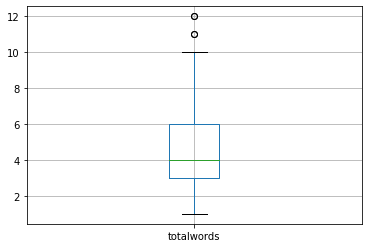

In [10]:
# Boxplot of the Totalwords column 
df_fin.boxplot(column ="total words" )

In [11]:
# - Calculate the number of unique words in the dataset
# getting the data reday to apply the count. 
unique = set(df[0].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())


from collections import Counter
df = pd.DataFrame(data)
unique = Counter()
df[0].str.lower().str.split().apply(unique.update)


# convert the count item into a dataframe
df_counted = pd.DataFrame.from_dict(unique, orient = "index").reset_index()
df_counted


C:\Users\basti\AppData\Local\Temp/ipykernel_14680/1583998216.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  unique = set(df[0].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())


,index,0
0,one,45
1,of,177
2,the,290
3,best,44
4,crichton,2
...,...,...
2554,doublespeak,1
2555,visit,1
2556,okay,1
2557,reefer,1


In [12]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [29]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length

from keras.preprocessing.sequence import pad_sequences

data4 = pad_sequences(tokenized_data, padding = "post" , maxlen = 4)
print(data4)


[[18  4  2 19]
 [ 2  4  2  0]
 [ 0  0  0  0]
 ...
 [ 0  0  0  0]
 [ 6  0  0  0]
 [ 0  0  0  0]]


In [14]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.

X = data4
y= labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle = True)

print(X_train.shape)



(1434, 4)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def assess_model(model, X_test, y_test):      
    #To do
    y_pred = ()
    con = ()
    log = model()
    log.fit(X_train, to_class(y_train))
    y_pred = log.predict(X_test).reshape(-1,1)
  
    print("classification_report")
    print(classification_report(to_class(y_test),y_pred))
    
    print("  ")
    print("conf_matrix")
    
    conf_mat = confusion_matrix(to_class(y_test), y_pred)
    cm = pd.DataFrame(conf_mat)
    cm
    print(cm)
    
assess_model(LogisticRegression, X_test, y_test)    
    
    
    
    
# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.


classification_report
              precision    recall  f1-score   support

           0       0.53      0.34      0.41       176
           1       0.53      0.71      0.60       183

    accuracy                           0.53       359
   macro avg       0.53      0.52      0.51       359
weighted avg       0.53      0.53      0.51       359

  
conf_matrix
    0    1
0  59  117
1  53  130


# Build and tune model

Define network architecture

In [16]:
# Embedding class
inputdim = 2600
outputdim = 35
inputlength = 4

# importing the layers needed from keras
from keras.layers import BatchNormalization
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout

In [73]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.4))
model.add(BatchNormalization())
#model.add(LSTM(32))  
model.add(Dense(2 ,activation='softmax'))


In [74]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


Train model

Model 1

In [79]:
model1 = model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

# outputdim of 10
inputdim = 2600
outputdim = 10
inputlength = 4
ep = 5
bs = 10

In [80]:
model1.fit(X_train, y_train, batch_size=bs, epochs=ep )

AttributeError: 'NoneType' object has no attribute 'fit'

Model 2

In [82]:
model2 = model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

# outputdim of 25
inputdim = 2600
outputdim = 25
inputlength = 4
ep = 5
bs = 10

In [ ]:
model2.fit(X_train, y_train, batch_size=bs, epochs=ep )

Model 3

In [ ]:

model3 = model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

# outputdim of 50
inputdim = 2600
outputdim = 50
inputlength = 4
ep = 5
bs = 10

In [92]:
model3.fit(X_train, y_train, batch_size=bs, epochs=ep )

NameError: name 'model3' is not defined

Model 4

In [85]:
model4 = model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

# outputdim of 100
inputdim = 2600
outputdim = 100
inputlength = 4
ep = 5
bs = 10

In [95]:
model4.fit(X_train, y_train, batch_size=bs, epochs=ep )

AttributeError: 'NoneType' object has no attribute 'fit'

Examine performance of model

In [66]:
# evaluate model 1
s = model1.evaluate(X_test, y_test)
print("score")
print(s[1])

ValueError: in user code:

    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1179 test_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:409 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\utils\metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\metrics.py:176 update_state_fn
        return ag_update_state(*args, **kwargs)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\metrics.py:612 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\metrics.py:3309 sparse_categorical_accuracy
        return math_ops.cast(math_ops.equal(y_true, y_pred), K.floatx())
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_ops.py:1614 equal
        return gen_math_ops.equal(x, y, name=name)
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:3221 equal
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\func_graph.py:591 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\ops.py:3477 _create_op_internal
        ret = Operation(
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\ops.py:1974 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\basti\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 2 and 4 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](IteratorGetNext:1, Cast_1)' with input shapes: [?,2], [?,4].


In [ ]:
# evaluate model 2
s = model2.evaluate(X_test, y_test)
print("score")
print(s[1])

In [ ]:
# evaluate model 3
s = model3.evaluate(X_test, y_test)
print("score")
print(s[1])

In [84]:
# evaluate model 4
s = model4.evaluate(X_test, y_test)
print("score")
print(s[1])

NameError: name 'model4' is not defined

Picking the final model based on score 

In [87]:
model_final = model4

Plot graphs for accuracy and loss

In [88]:
# Plot of the Accuracy of the model

history = model_final
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show

# this code was adatped form https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

AttributeError: 'NoneType' object has no attribute 'history'

In [89]:
# Plot of the Accuracy of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# this code was adatped form https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

AttributeError: 'NoneType' object has no attribute 'history'

# Make a prediction

In [90]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=4)


# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.


data_test = to_word_label(padded)
print(data_test)

data_1 = []
for i in range(0,5):
    d = data_test[i]
    if d == 'positive':
        data_1.append(0)
    else:
        data_1.append(1)
print(data_1)

pred = model_final(data_1)
for i in range(0,5):
    
    print(i)
    print("predition")
    print(pred(i))
    print("test y")
    print(y_test[i])
    print("       ")

['negative', 'positive', 'negative', 'positive', 'positive']
[1, 0, 1, 0, 0]


TypeError: 'NoneType' object is not callable